### Importação dos dados



In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [164]:
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

def exibir_faturamento(loja_df, nome_loja):
    total = loja_df["Preço"].sum()
    print(f"- {nome_loja}: {formatar_reais(total)}")
    return total

print("\nFATURAMENTO TOTAL POR LOJA")
print("-" * 30)

faturamento_loja1 = exibir_faturamento(loja, "Loja 1")
faturamento_loja2 = exibir_faturamento(loja2, "Loja 2")
faturamento_loja3 = exibir_faturamento(loja3, "Loja 3")
faturamento_loja4 = exibir_faturamento(loja4, "Loja 4")

print("-" * 30)


FATURAMENTO TOTAL POR LOJA
------------------------------
- Loja 1: R$ 1.534.509,12
- Loja 2: R$ 1.488.459,06
- Loja 3: R$ 1.464.025,03
- Loja 4: R$ 1.384.497,58
------------------------------


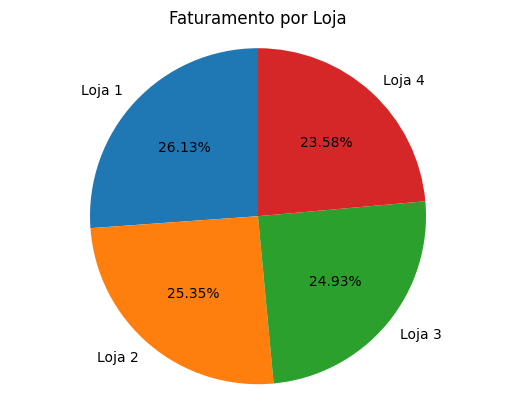

In [130]:
import matplotlib.pyplot as plt

valores = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.pie(valores, labels=lojas, autopct='%1.2f%%', startangle=90)

plt.title("Faturamento por Loja")
plt.axis('equal')

plt.show()


# 2. Vendas por Categoria


In [165]:
def exibir_categorias_populares(loja_df, nome_loja):
    print(f"\n{'='*40}")
    print(f"Categorias Populares - {nome_loja}")
    print("-" * 40)

    categorias = loja_df["Categoria do Produto"].value_counts()
    for categoria, qtd in categorias.items():
        print(f"- {categoria}: {qtd} vendas")

print("\nCATEGORIAS POPULARES POR LOJA (Ordem Decrescente de Vendas)")


exibir_categorias_populares(loja, "Loja 1")
exibir_categorias_populares(loja2, "Loja 2")
exibir_categorias_populares(loja3, "Loja 3")
exibir_categorias_populares(loja4, "Loja 4")

print(f"\n{'='*40}")



CATEGORIAS POPULARES POR LOJA (Ordem Decrescente de Vendas)

Categorias Populares - Loja 1
----------------------------------------
- moveis: 465 vendas
- eletronicos: 448 vendas
- brinquedos: 324 vendas
- eletrodomesticos: 312 vendas
- esporte e lazer: 284 vendas
- instrumentos musicais: 182 vendas
- livros: 173 vendas
- utilidades domesticas: 171 vendas

Categorias Populares - Loja 2
----------------------------------------
- moveis: 442 vendas
- eletronicos: 422 vendas
- brinquedos: 313 vendas
- eletrodomesticos: 305 vendas
- esporte e lazer: 275 vendas
- instrumentos musicais: 224 vendas
- livros: 197 vendas
- utilidades domesticas: 181 vendas

Categorias Populares - Loja 3
----------------------------------------
- moveis: 499 vendas
- eletronicos: 451 vendas
- brinquedos: 315 vendas
- eletrodomesticos: 278 vendas
- esporte e lazer: 277 vendas
- livros: 185 vendas
- instrumentos musicais: 177 vendas
- utilidades domesticas: 177 vendas

Categorias Populares - Loja 4
--------------

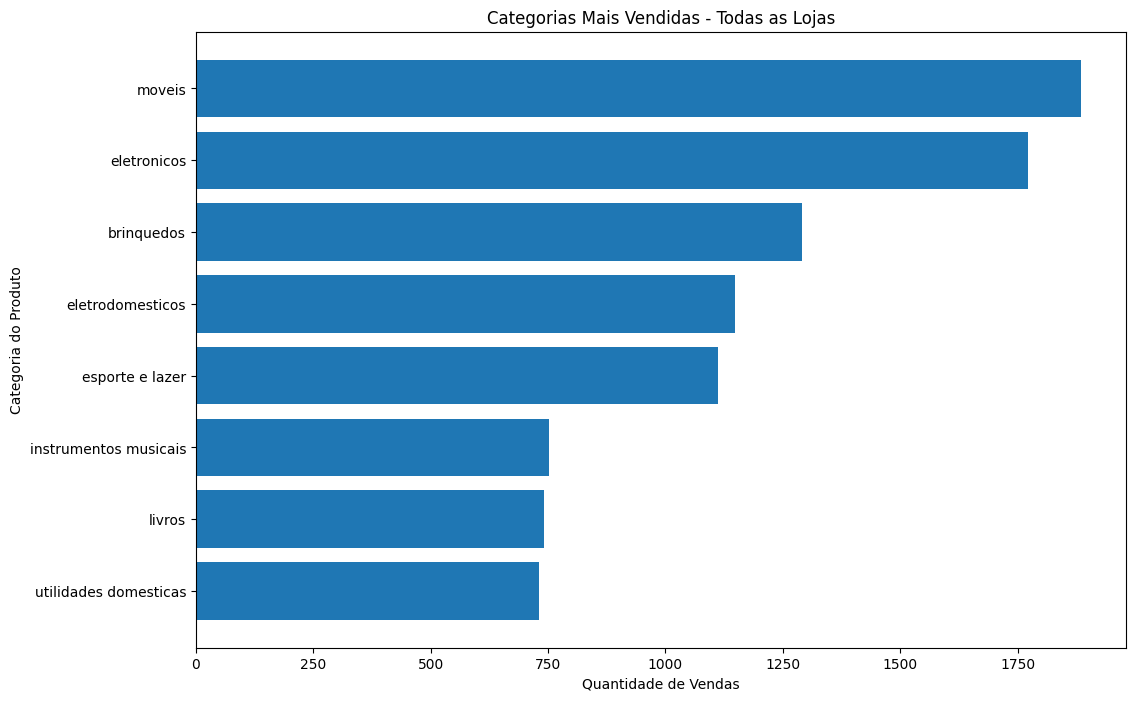

In [88]:
todas_as_lojas = pd.concat([loja, loja2, loja3, loja4])

categoria_counts = todas_as_lojas["Categoria do Produto"].value_counts()

plt.figure(figsize=(12, 8))
plt.barh(categoria_counts.index, categoria_counts.values)
plt.title('Categorias Mais Vendidas - Todas as Lojas')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Categoria do Produto')
plt.gca().invert_yaxis()
plt.show()


# 3. Média de Avaliação das Lojas

In [166]:
media_avaliacoes_loja1 = loja["Avaliação da compra"].mean()
media_avaliacoes_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacoes_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacoes_loja4 = loja4["Avaliação da compra"].mean()


print("\nMÉDIA DE AVALIAÇÕES POR LOJA")
print("-" * 30)
print("LOJA 1:", round(media_avaliacoes_loja1, 2))
print("LOJA 2:", round(media_avaliacoes_loja2, 2))
print("LOJA 3:", round(media_avaliacoes_loja3, 2))
print("LOJA 4:", round(media_avaliacoes_loja4, 2))
print("-" * 30)


MÉDIA DE AVALIAÇÕES POR LOJA
------------------------------
LOJA 1: 3.98
LOJA 2: 4.04
LOJA 3: 4.05
LOJA 4: 4.0
------------------------------


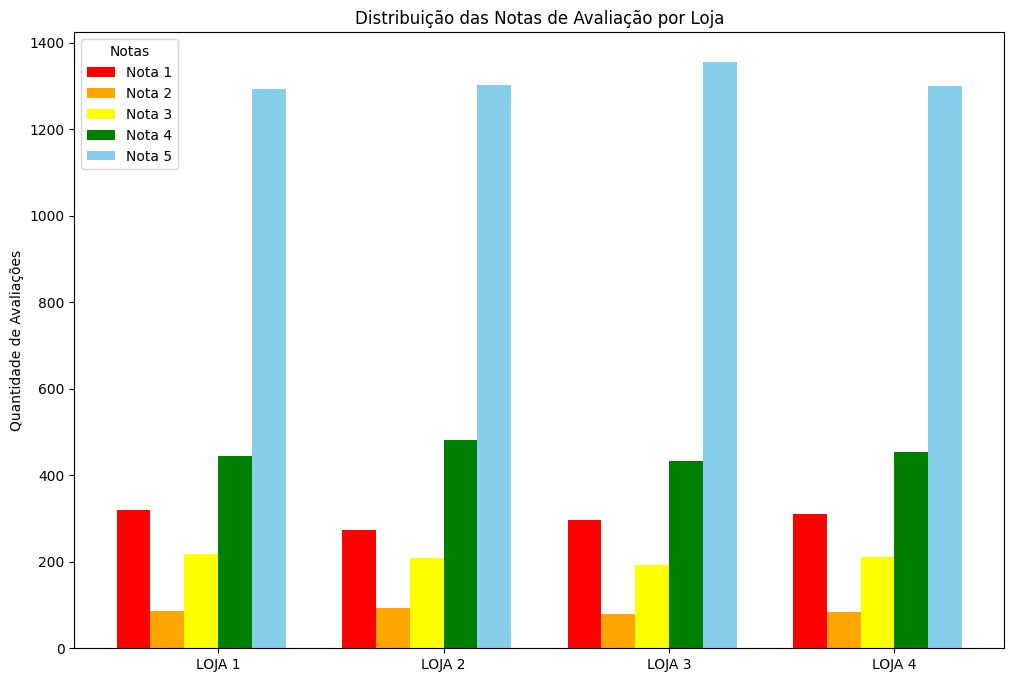

In [120]:

import numpy as np


lojas = ['LOJA 1', 'LOJA 2', 'LOJA 3', 'LOJA 4']
dados_lojas = [loja['Avaliação da compra'], loja2['Avaliação da compra'], loja3['Avaliação da compra'], loja4['Avaliação da compra']]

notas = [1, 2, 3, 4, 5]

nota_counts_por_loja = []
for dados in dados_lojas:
    nota_counts = dados.value_counts().reindex(notas, fill_value=0)
    nota_counts_por_loja.append(nota_counts.values)


nota_counts_por_loja = np.array(nota_counts_por_loja)

x = np.arange(len(lojas))
plt.figure(figsize=(12, 8))


for i, nota in enumerate(notas):
    plt.bar(x + i * largura, nota_counts_por_loja[:, i], largura, color=cores[i], label=f"Nota {nota}")

plt.title('Distribuição das Notas de Avaliação por Loja')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(x + largura * 2.5, lojas)
plt.legend(title="Notas", loc='upper left')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [139]:
def exibir(loja_df, nome_loja, top_n=3):
    contagem = loja_df["Produto"].value_counts()
    mais_vendidos = contagem.head(top_n)
    menos_vendidos = contagem.tail(1)

    print(f"\n{'='*40}")
    print(f"{nome_loja}")
    print("-" * 40)

    print("Produtos Mais Vendidos:")
    for produto, qtd in mais_vendidos.items():
        print(f"- {produto} — {qtd} unidades")

    print("\nProduto Menos Vendido:")
    for produto, qtd in menos_vendidos.items():
        print(f"- {produto} — {qtd} unidades")
    print(f"{'='*40}")

# Aplicar a função para cada loja
exibir(loja, "Loja 1")
exibir(loja2, "Loja 2")
exibir(loja3, "Loja 3")
exibir(loja4, "Loja 4")


Loja 1
----------------------------------------
Produtos Mais Vendidos:
- Micro-ondas — 60 unidades
- TV Led UHD 4K — 60 unidades
- Guarda roupas — 60 unidades

Produto Menos Vendido:
- Celular ABXY — 33 unidades

Loja 2
----------------------------------------
Produtos Mais Vendidos:
- Iniciando em programação — 65 unidades
- Micro-ondas — 62 unidades
- Bateria — 61 unidades

Produto Menos Vendido:
- Jogo de tabuleiro — 32 unidades

Loja 3
----------------------------------------
Produtos Mais Vendidos:
- Kit banquetas — 57 unidades
- Mesa de jantar — 56 unidades
- Cama king — 56 unidades

Produto Menos Vendido:
- Blocos de montar — 35 unidades

Loja 4
----------------------------------------
Produtos Mais Vendidos:
- Cama box — 62 unidades
- Faqueiro — 59 unidades
- Dashboards com Power BI — 56 unidades

Produto Menos Vendido:
- Guitarra — 33 unidades


# 5. Frete Médio por Loja


In [169]:
# Calcular o custo médio de frete por loja
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Função para formatar como moeda brasileira
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

# Exibir resultados formatados
print("\nCUSTO MÉDIO DE FRETE POR LOJA")
print("-" * 30)
print(f"Loja 1: {formatar_reais(frete_medio_loja1)}")
print(f"Loja 2: {formatar_reais(frete_medio_loja2)}")
print(f"Loja 3: {formatar_reais(frete_medio_loja3)}")
print(f"Loja 4: {formatar_reais(frete_medio_loja4)}")
print("-" * 30)


CUSTO MÉDIO DE FRETE POR LOJA
------------------------------
Loja 1: R$ 34,69
Loja 2: R$ 33,62
Loja 3: R$ 33,07
Loja 4: R$ 31,28
------------------------------


# 6. Relatório Final

###🧭 Introdução

O objetivo desta análise foi avaliar o desempenho de quatro lojas virtuais sob diferentes perspectivas, para auxiliar o Senhor João na tomada de decisão sobre qual loja deve ser vendida. A decisão é baseada em uma combinação de métricas, incluindo **faturamento**, **avaliações dos clientes**, **produtos mais e menos vendidos**, **categorias mais populares** e o **custo médio de frete**. A seguir, apresentamos os resultados obtidos, acompanhados de interpretações estratégicas para cada indicador.

---


####💰 Faturamento Total

A Loja 1 obteve o **maior faturamento**, totalizando R$ 1.534.509,12. Ela é seguida pelas Lojas 2 e 3, com valores similares, e por último a Loja 4.

| Loja     | Faturamento    |
|----------|----------------|
| Loja 1   | 1.534.509,12   |
| Loja 2   | 1.488.459,06   |
| Loja 3   | 1.464.025,03   |
| Loja 4   | 1.384.497,58   |

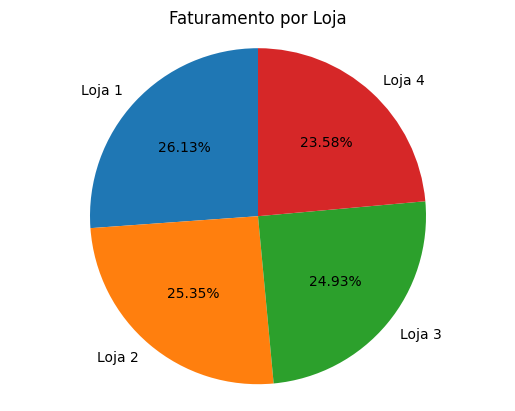


> Loja 1 lidera em receita, demonstrando maior volume de vendas.

---

#### ⭐ Avaliações dos Clientes

A Loja 3 possui a **melhor avaliação média** dos clientes.


| Loja     | Média de Avaliações |
|----------|---------------------|
| Loja 3   | 4.05                |
| Loja 2   | 4.04                |
| Loja 4   | 4.00                |
| Loja 1   | 3.98                |


---

#### 📦 Produtos Mais e Menos Vendidos

Cada loja apresenta destaque em produtos distintos. A Loja 2, por exemplo, teve **produtos com maiores volumes de vendas individuais** (até 65 unidades), enquanto a Loja 1 teve **três produtos empatados** como mais vendidos (60 unidades cada).

**Loja 1**
- Mais vendidos: Micro-ondas, TV Led UHD 4K, Guarda-roupas (60 unidades)
- Menos vendido: Celular ABXY (33 unidades)

**Loja 2**
- Mais vendidos: Iniciando em programação (65), Micro-ondas (62), Bateria (61)
- Menos vendido: Jogo de tabuleiro (32)

**Loja 3**
- Mais vendidos: Kit banquetas (57), Mesa de jantar (56), Cama king (56)
- Menos vendido: Blocos de montar (35)

**Loja 4**
- Mais vendidos: Cama box (62), Faqueiro (59), Dashboards com Power BI (56)
- Menos vendido: Guitarra (33)


#### 🚚 Custo Médio de Frete

A Loja 4 possui o **menor custo médio de frete** (R$ 31,28), o que pode representar maior eficiência logística ou localização estratégica.

| Loja     | Frete Médio |
|----------|-------------|
| Loja 4   |   31,28    |
| Loja 3   |   33,07    |
| Loja 2   |   33,62    |
| Loja 1   |   34,69    |

---

### ✅ Conclusão e Recomendação

Com base nos dados analisados, **recomendamos que o Senhor João venda a Loja 4**. Apesar de ter o menor custo de frete, essa loja apresenta o **menor faturamento total** e **menor diversidade entre produtos de destaque**. Sua performance geral é inferior às demais, o que a torna a escolha mais lógica para desinvestimento.

